In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Open Sans'

In [2]:
l_subun = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 
           'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z','0', '1', '2', '3', '4', '5', '6', '7']
s_subun = ['a', 'b','c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 
           's', 't','u']

In [3]:
socolor1 = '#228833'
socolor2 = '#228833'
socolor3 = '#228833'
socolor4 = '#228833'
colorssoft = [socolor1, socolor2, socolor3, socolor4]

twcolor1 = '#66CCEE'
twcolor2 = '#66CCEE'
twcolor3 = '#66CCEE'
twcolor4 = '#66CCEE'
colorssoft2 = [twcolor1, twcolor2, twcolor3, twcolor4]

lpcolor1 = '#EE6677'
lpcolor2 = '#EE6677'
lpcolor3 = '#EE6677'
lpcolor4 = '#EE6677'
colorslimp = [lpcolor1, lpcolor2, lpcolor3, lpcolor4]

stcolor1 = '#AA3377'
stcolor2 = '#AA3377'
stcolor3 = '#AA3377'
stcolor4 = '#AA3377'
colorsstiff = [stcolor1, stcolor2, stcolor3, stcolor4]

aacolor1 = '#CCBB44'
aacolor2 = '#CCBB44'
aacolor3 = '#CCBB44'
aacolor4 = '#CCBB44'
colorsaa = [aacolor1, aacolor2, aacolor3, aacolor4]

In [4]:
singlecolor = '#4477AA'

In [5]:
l_proteins = ['0', '1', '2', '3', '4', '5', '6', '7','A','B','C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 
           'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
s_proteins = ['a','b','c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 
           's', 't','u']

In [6]:
NETS = ['STIFF','SOFT','SOFT2','LIMP']

In [7]:
NETS.append('AA')

In [8]:
import pandas as pd

def load_from_csv(filename):
    df = pd.read_csv(filename, index_col=0)  
    loaded_dict = {}
    for chain in df.columns:
        arr = df[chain].values
        arr_no_nan = arr[~np.isnan(arr)]     
        loaded_dict[chain] = arr_no_nan
    return loaded_dict

In [9]:
prot_rmsf_small_average_stiff = load_from_csv('./data/rmsf_small_average_stiff.csv')
prot_rmsf_small_average_soft = load_from_csv('./data/rmsf_small_average_soft.csv')
prot_rmsf_small_average_soft2 = load_from_csv('./data/rmsf_small_average_soft2.csv')
prot_rmsf_small_average_limp = load_from_csv('./data/rmsf_small_average_limp.csv')
prot_rmsf_small_average_aa = load_from_csv('./data/rmsf_small_average_aa.csv')

In [10]:
prot_rmsf_large_average_stiff = load_from_csv('./data/rmsf_large_average_stiff.csv')
prot_rmsf_large_average_soft = load_from_csv('./data/rmsf_large_average_soft.csv')
prot_rmsf_large_average_soft2 = load_from_csv('./data/rmsf_large_average_soft2.csv')
prot_rmsf_large_average_limp = load_from_csv('./data/rmsf_large_average_limp.csv')
prot_rmsf_large_average_aa = load_from_csv('./data/rmsf_large_average_aa.csv')

In [11]:
prot_rmsf_large_average_aa_cut = {}
for chain in l_subun:
    if chain in ['A','B']:
        prot_rmsf_large_average_aa_cut[chain] = prot_rmsf_large_average_aa[chain][1:]
    else: 
        prot_rmsf_large_average_aa_cut[chain] = prot_rmsf_large_average_aa[chain][:-1]

In [12]:
prot_rmsf_small_average_aa_cut = {}
for chain in s_subun:
    if chain == 'a':
        prot_rmsf_small_average_aa_cut[chain] = prot_rmsf_small_average_aa[chain][1:]
    else: 
        prot_rmsf_small_average_aa_cut[chain] = prot_rmsf_small_average_aa[chain][:-1]

In [13]:
violin_small_stiff = pd.DataFrame(prot_rmsf_small_average_stiff.items(), columns=['CHAINS','STIFF'])
violin_small=violin_small_stiff.explode('STIFF')
violin_small_soft = pd.DataFrame(prot_rmsf_small_average_soft.items(), columns=['CHAINS','SOFT']).explode('SOFT')
violin_small['SOFT'] = violin_small_soft['SOFT'].values
violin_small_soft2 = pd.DataFrame(prot_rmsf_small_average_soft2.items(), columns=['CHAINS','SOFT2']).explode('SOFT2')
violin_small['SOFT2'] = violin_small_soft2['SOFT2'].values
violin_small_limp = pd.DataFrame(prot_rmsf_small_average_limp.items(), columns=['CHAINS','LIMP']).explode('LIMP')
violin_small['LIMP'] = violin_small_limp['LIMP'].values

violin_small_aa = pd.DataFrame(prot_rmsf_small_average_aa_cut.items(), columns=['CHAINS','AA'])
violin_small_aa=violin_small_aa.explode('AA')
violin_small['AA'] = violin_small_aa['AA'].values

In [14]:
violin_large_stiff = pd.DataFrame(prot_rmsf_large_average_stiff.items(), columns=['CHAINS','STIFF'])
violin_large=violin_large_stiff.explode('STIFF')
violin_large_soft = pd.DataFrame(prot_rmsf_large_average_soft.items(), columns=['CHAINS','SOFT']).explode('SOFT')
violin_large['SOFT'] = violin_large_soft['SOFT'].values
violin_large_soft2 = pd.DataFrame(prot_rmsf_large_average_soft2.items(), columns=['CHAINS','SOFT2']).explode('SOFT2')
violin_large['SOFT2'] = violin_large_soft2['SOFT2'].values
violin_large_limp = pd.DataFrame(prot_rmsf_large_average_limp.items(), columns=['CHAINS','LIMP']).explode('LIMP')
violin_large['LIMP'] = violin_large_limp['LIMP'].values

violin_large_aa = pd.DataFrame(prot_rmsf_large_average_aa_cut.items(), columns=['CHAINS','AA'])
violin_large_aa=violin_large_aa.explode('AA')
violin_large['AA'] = violin_large_aa['AA'].values

In [15]:
frames = [violin_small,violin_large]

In [16]:
violin_all = pd.concat(frames)

/home/cikhartj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cikhartj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cikhartj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cikhartj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

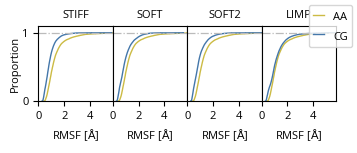

In [17]:
plt.rcParams['font.family'] = 'Open Sans'
fig, axs = plt.subplots(ncols=4, figsize=(3.5, 1.0), sharey=True)
for i in range(2):
    sns.ecdfplot(ax=axs[i], data=violin_all, x='AA', color=aacolor1, linewidth=1.00)
    sns.ecdfplot(ax=axs[i], data=violin_all, x=NETS[i], color=singlecolor, linewidth=1.00)
    axs[0].set_yticks([0, 1.0])
    axs[0].set_yticklabels([0,1], size=8)
    axs[i].set_ylabel('Proportion', labelpad=0)
    axs[i].set_xticks([0, 2, 4, 6])
    axs[i].set_xticklabels([0,2,4,"",], size=8)
    axs[i].set_ylim(0, 1.1)
    axs[i].set_xlim(0, 5.8)
    axs[i].axhline(1, color='#BBBBBB', linewidth=0.9, linestyle='dashdot')
    axs[i].set_xlabel('RMSF [$\mathrm{\AA}$]', fontsize=8)
    axs[i].set_title(NETS[i], fontsize=8)
    axs[1].tick_params(axis='y', width=0)
 

for i in range(2):
    sns.ecdfplot(ax=axs[i + 2], data=violin_all, x='AA', color=aacolor1, linewidth=1.00)
    sns.ecdfplot(ax=axs[i + 2], data=violin_all, x=NETS[i + 2], color=singlecolor, linewidth=1.00)
    axs[i + 2].set_xticks([0, 2, 4, 6])
    axs[i+2].set_xticklabels([0,2,4,"",], size=8)
    axs[i + 2].set_ylim(0, 1.1)
    axs[i + 2].set_xlim(0, 5.8)
    axs[i + 2].axhline(1, color='#BBBBBB', linewidth=0.9, linestyle='dashdot')
    axs[i + 2].set_xlabel('RMSF [$\mathrm{\AA}$]', fontsize=8)
    axs[i+2].set_title(NETS[i+2], fontsize=8)
    axs[i+2].tick_params(axis='y', width=0)

axs[0].set_ylabel('Proportion', labelpad=1, fontsize=8)

leg = fig.legend(['AA', 'CG'], handlelength=1.0, handleheight=1.5,ncol=1, fontsize=8)

fig.subplots_adjust(left=0.1, right=0.95, bottom=0.2, top=0.95, wspace=0)
plt.show()

In [18]:
from scipy.stats import pearsonr

def calculate_pearson_correlation_s(list1, list2, list3, list4, list5):
    korel_dict = {}
    for i in s_proteins:
        if i == 'a':
            correlations = []
            
            correlation1 = pearsonr(list1[i], list5[i][1:])
            correlation2 = pearsonr(list2[i], list5[i][1:])
            correlation3 = pearsonr(list3[i], list5[i][1:])
            correlation4 = pearsonr(list4[i], list5[i][1:])
            
            correlations.append(correlation1)
            correlations.append(correlation2)
            correlations.append(correlation3)
            correlations.append(correlation4)

            korel_dict[i]=correlations
        else:
            correlations = []
            
            correlation1 = pearsonr(list1[i], list5[i][:-1])
            correlation2 = pearsonr(list2[i], list5[i][:-1])
            correlation3 = pearsonr(list3[i], list5[i][:-1])
            correlation4 = pearsonr(list4[i], list5[i][:-1])
            
            correlations.append(correlation1)
            correlations.append(correlation2)
            correlations.append(correlation3)
            correlations.append(correlation4)

            korel_dict[i]=correlations
            
    return korel_dict
def calculate_pearson_correlation_l(list1, list2, list3, list4, list5):
    korel_dict = {}
    for i in l_proteins:
        if i in ['A','B']:
            correlations = []
            
            correlation1 = pearsonr(list1[i], list5[i][1:])
            correlation2 = pearsonr(list2[i], list5[i][1:])
            correlation3 = pearsonr(list3[i], list5[i][1:])
            correlation4 = pearsonr(list4[i], list5[i][1:])
            
            correlations.append(correlation1)
            correlations.append(correlation2)
            correlations.append(correlation3)
            correlations.append(correlation4)
    
            korel_dict[i]=correlations
        else:
            correlations = []
            
            correlation1 = pearsonr(list1[i], list5[i][:-1])
            correlation2 = pearsonr(list2[i], list5[i][:-1])
            correlation3 = pearsonr(list3[i], list5[i][:-1])
            correlation4 = pearsonr(list4[i], list5[i][:-1])
            
            correlations.append(correlation1)
            correlations.append(correlation2)
            correlations.append(correlation3)
            correlations.append(correlation4)
    
            korel_dict[i]=correlations
    return korel_dict

In [19]:
correl_l = calculate_pearson_correlation_l(prot_rmsf_large_average_stiff, prot_rmsf_large_average_soft, prot_rmsf_large_average_soft2, prot_rmsf_large_average_limp, prot_rmsf_large_average_aa)
correl_s = calculate_pearson_correlation_s(prot_rmsf_small_average_stiff, prot_rmsf_small_average_soft, prot_rmsf_small_average_soft2, prot_rmsf_small_average_limp, prot_rmsf_small_average_aa)

In [20]:
correl_stiff_l = []
correl_soft_l = []
correl_soft2_l = []
correl_limp_l = []
for i in l_proteins:
    correl_stiff_l.append(correl_l[i][0].statistic)
    correl_soft_l.append(correl_l[i][1].statistic)
    correl_soft2_l.append(correl_l[i][2].statistic)
    correl_limp_l.append(correl_l[i][3].statistic)

In [21]:
correl_stiff_s = []
correl_soft_s = []
correl_soft2_s = []
correl_limp_s = []
for i in s_proteins:
    correl_stiff_s.append(correl_s[i][0].statistic)
    correl_soft_s.append(correl_s[i][1].statistic)
    correl_soft2_s.append(correl_s[i][2].statistic)
    correl_limp_s.append(correl_s[i][3].statistic)

In [22]:
def correl_high_per(data_list):
    correl_per = []
    for j in range(np.size(data_list)):
        if data_list[j] >= 0.8:
            correl_per.append(1)
        else:
            correl_per.append(0)
    return(correl_per)

In [23]:
correl_stiff_s_high = correl_high_per(correl_stiff_s)
correl_stiff_l_high = correl_high_per(correl_stiff_l)

In [24]:
correl_stiff_s_high_per = sum(correl_stiff_s_high)/len(correl_stiff_s_high)*100
correl_stiff_l_high_per = sum(correl_stiff_l_high)/len(correl_stiff_l_high)*100

In [25]:
correl_soft_s_high = correl_high_per(correl_soft_s)
correl_soft_l_high = correl_high_per(correl_soft_l)

In [26]:
correl_soft_s_high_per = sum(correl_soft_s_high)/len(correl_soft_s_high)*100
correl_soft_l_high_per = sum(correl_soft_l_high)/len(correl_soft_l_high)*100

In [27]:
correl_soft2_s_high = correl_high_per(correl_soft2_s)
correl_soft2_l_high = correl_high_per(correl_soft2_l)

In [28]:
correl_soft2_s_high_per = sum(correl_soft2_s_high)/len(correl_soft2_s_high)*100
correl_soft2_l_high_per = sum(correl_soft2_l_high)/len(correl_soft2_l_high)*100

In [29]:
correl_limp_s_high = correl_high_per(correl_limp_s)
correl_limp_l_high = correl_high_per(correl_limp_l)

In [30]:
correl_limp_s_high_per = sum(correl_limp_s_high)/len(correl_limp_s_high)*100
correl_limp_l_high_per = sum(correl_limp_l_high)/len(correl_limp_l_high)*100

In [31]:
total_limp_correl_high = correl_limp_l_high+correl_limp_s_high

In [32]:
total_soft2_correl_high= correl_soft2_l_high+correl_soft2_s_high

In [33]:
total_soft_correl_high = correl_soft_l_high+correl_soft_s_high

In [34]:
total_stiff_correl_high = correl_stiff_l_high+correl_stiff_s_high

In [35]:
total_stiff_correl_high_per = sum(total_stiff_correl_high)/len(total_stiff_correl_high)*100
total_soft_correl_high_per = sum(total_soft_correl_high)/len(total_soft_correl_high)*100
total_soft2_correl_high_per = sum(total_soft2_correl_high)/len(total_soft2_correl_high)*100
total_limp_correl_high_per = sum(total_limp_correl_high)/len(total_limp_correl_high)*100

In [36]:
def correl_07_per(data_list):
    correl_per = []
    for j in range(np.size(data_list)):
        if data_list[j] >= 0.7:
            correl_per.append(1)
        else:
            correl_per.append(0)
    return(correl_per)

In [37]:
def correl_08_per(data_list):
    correl_per = []
    for j in range(np.size(data_list)):
        if data_list[j] >= 0.8:
            correl_per.append(1)
        else:
            correl_per.append(0)
    return(correl_per)

In [38]:
def correl_neg_low_per(data_list):
    correl_per = []
    for j in range(np.size(data_list)):
        if data_list[j] <= 0.4:
            correl_per.append(1)
        else:
            correl_per.append(0)
    return(correl_per)

In [39]:
correl_stiff_s_07 = correl_07_per(correl_stiff_s)
correl_stiff_l_07 = correl_07_per(correl_stiff_l)

In [40]:
correl_stiff_s_07_per = sum(correl_stiff_s_07)/len(correl_stiff_s_07)*100
correl_stiff_l_07_per = sum(correl_stiff_l_07)/len(correl_stiff_l_07)*100

In [41]:
correl_soft_s_07 = correl_07_per(correl_soft_s)
correl_soft_l_07 = correl_07_per(correl_soft_l)

In [42]:
correl_soft_s_07_per = sum(correl_soft_s_07)/len(correl_soft_s_07)*100
correl_soft_l_07_per = sum(correl_soft_l_07)/len(correl_soft_l_07)*100

In [43]:
correl_soft2_s_07 = correl_07_per(correl_soft2_s)
correl_soft2_l_07 = correl_07_per(correl_soft2_l)

In [44]:
correl_soft2_s_07_per = sum(correl_soft2_s_07)/len(correl_soft2_s_07)*100
correl_soft2_l_07_per = sum(correl_soft2_l_07)/len(correl_soft2_l_07)*100

In [45]:
correl_limp_s_07 = correl_07_per(correl_limp_s)
correl_limp_l_07 = correl_07_per(correl_limp_l)

In [46]:
correl_limp_s_07_per = sum(correl_limp_s_07)/len(correl_limp_s_07)*100
correl_limp_l_07_per = sum(correl_limp_l_07)/len(correl_limp_l_07)*100

In [47]:
total_limp_correl_07 = correl_limp_l_07+correl_limp_s_07

In [48]:
total_soft2_correl_07 = correl_soft2_l_07+correl_soft2_s_07

In [49]:
total_soft_correl_07 = correl_soft_l_07+correl_soft_s_07

In [50]:
total_stiff_correl_07 = correl_stiff_l_07+correl_stiff_s_07

In [51]:
total_stiff_correl_07_per = sum(total_stiff_correl_07)/len(total_stiff_correl_07)*100
total_soft_correl_07_per = sum(total_soft_correl_07)/len(total_soft_correl_07)*100
total_soft2_correl_07_per = sum(total_soft2_correl_07)/len(total_soft2_correl_07)*100
total_limp_correl_07_per = sum(total_limp_correl_07)/len(total_limp_correl_07)*100

In [52]:
correl_stiff_s_08 = correl_08_per(correl_stiff_s)
correl_stiff_l_08 = correl_08_per(correl_stiff_l)

In [53]:
correl_stiff_s_08_per = sum(correl_stiff_s_08)/len(correl_stiff_s_08)*100
correl_stiff_l_08_per = sum(correl_stiff_l_08)/len(correl_stiff_l_08)*100

In [54]:
correl_soft_s_08 = correl_08_per(correl_soft_s)
correl_soft_l_08 = correl_08_per(correl_soft_l)

In [55]:
correl_soft_s_08_per = sum(correl_soft_s_08)/len(correl_soft_s_08)*100
correl_soft_l_08_per = sum(correl_soft_l_08)/len(correl_soft_l_08)*100

In [56]:
correl_soft2_s_08 = correl_08_per(correl_soft2_s)
correl_soft2_l_08 = correl_08_per(correl_soft2_l)

In [57]:
correl_soft2_s_08_per = sum(correl_soft2_s_08)/len(correl_soft2_s_08)*100
correl_soft2_l_08_per = sum(correl_soft2_l_08)/len(correl_soft2_l_08)*100

In [58]:
correl_limp_s_08 = correl_08_per(correl_limp_s)
correl_limp_l_08 = correl_08_per(correl_limp_l)

In [59]:
correl_limp_s_08_per = sum(correl_limp_s_08)/len(correl_limp_s_08)*100
correl_limp_l_08_per = sum(correl_limp_l_08)/len(correl_limp_l_08)*100

In [60]:
total_limp_correl_08 = correl_limp_l_08+correl_limp_s_08

In [61]:
total_soft2_correl_08 = correl_soft2_l_08+correl_soft2_s_08

In [62]:
total_soft_correl_08 = correl_soft_l_08+correl_soft_s_08

In [63]:
total_stiff_correl_08 = correl_stiff_l_08+correl_stiff_s_08

In [64]:
total_stiff_correl_08_per = sum(total_stiff_correl_08)/len(total_stiff_correl_08)*100
total_soft_correl_08_per = sum(total_soft_correl_08)/len(total_soft_correl_08)*100
total_soft2_correl_08_per = sum(total_soft2_correl_08)/len(total_soft2_correl_08)*100
total_limp_correl_08_per = sum(total_limp_correl_08)/len(total_limp_correl_08)*100

In [65]:
correl_stiff_s_neg_low = correl_neg_low_per(correl_stiff_s)
correl_stiff_l_neg_low = correl_neg_low_per(correl_stiff_l)

In [66]:
correl_stiff_s_neg_low_per = sum(correl_stiff_s_neg_low)/len(correl_stiff_s_neg_low)*100
correl_stiff_l_neg_low_per = sum(correl_stiff_l_neg_low)/len(correl_stiff_l_neg_low)*100

In [67]:
correl_soft_s_neg_low = correl_neg_low_per(correl_soft_s)
correl_soft_l_neg_low = correl_neg_low_per(correl_soft_l)

In [68]:
correl_soft_s_neg_low_per = sum(correl_soft_s_neg_low)/len(correl_soft_s_neg_low)*100
correl_soft_l_neg_low_per = sum(correl_soft_l_neg_low)/len(correl_soft_l_neg_low)*100

In [69]:
correl_soft2_s_neg_low = correl_neg_low_per(correl_soft2_s)
correl_soft2_l_neg_low = correl_neg_low_per(correl_soft2_l)

In [70]:
correl_soft2_s_neg_low_per = sum(correl_soft2_s_neg_low)/len(correl_soft2_s_neg_low)*100
correl_soft2_l_neg_low_per = sum(correl_soft2_l_neg_low)/len(correl_soft2_l_neg_low)*100

In [71]:
correl_limp_s_neg_low = correl_neg_low_per(correl_limp_s)
correl_limp_l_neg_low = correl_neg_low_per(correl_limp_l)

In [72]:
correl_limp_s_neg_low_per = sum(correl_limp_s_neg_low)/len(correl_limp_s_neg_low)*100
correl_limp_l_neg_low_per = sum(correl_limp_l_neg_low)/len(correl_limp_l_neg_low)*100

In [73]:
total_limp_correl_neg = correl_limp_l_neg_low+correl_limp_s_neg_low

In [74]:
total_soft2_correl_neg = correl_soft2_l_neg_low+correl_soft2_s_neg_low

In [75]:
total_soft_correl_neg = correl_soft_l_neg_low+correl_soft_s_neg_low

In [76]:
total_stiff_correl_neg = correl_stiff_l_neg_low+correl_stiff_s_neg_low

In [77]:
total_stiff_correl_neg_per = sum(total_stiff_correl_neg)/len(total_stiff_correl_neg)*100
total_soft_correl_neg_per = sum(total_soft_correl_neg)/len(total_soft_correl_neg)*100
total_soft2_correl_neg_per = sum(total_soft2_correl_neg)/len(total_soft2_correl_neg)*100
total_limp_correl_neg_per = sum(total_limp_correl_neg)/len(total_limp_correl_neg)*100

In [78]:
correl_07_per_s = [correl_stiff_s_07_per, correl_soft_s_07_per, correl_soft2_s_07_per, correl_limp_s_07_per]
correl_07_per_l = [correl_stiff_l_07_per, correl_soft_l_07_per, correl_soft2_l_07_per, correl_limp_l_07_per]

correl_08_per_s = [correl_stiff_s_08_per, correl_soft_s_08_per, correl_soft2_s_08_per, correl_limp_s_08_per]
correl_08_per_l = [correl_stiff_l_08_per, correl_soft_l_08_per, correl_soft2_l_08_per, correl_limp_l_08_per]

correl_neg_low_per_s = [correl_stiff_s_neg_low_per, correl_soft_s_neg_low_per, correl_soft2_s_neg_low_per, correl_limp_s_neg_low_per]
correl_neg_low_per_l = [correl_stiff_l_neg_low_per, correl_soft_l_neg_low_per, correl_soft2_l_neg_low_per, correl_limp_l_neg_low_per]

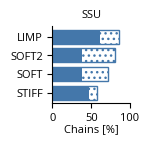

In [89]:
plt.rcParams['font.family'] = 'Open Sans'
fig, axs = plt.subplots(figsize=(1.0, 1.0))
width = 0.75
correl_07_per_s
correl_08_per_s
NETS=['STIFF', 'SOFT', 'SOFT2', 'LIMP']
bar_colors_s = [singlecolor, singlecolor, singlecolor, singlecolor]

bars_07 = axs.barh(
    NETS, 
    correl_07_per_s, 
    height=width, 
    color='none',           
    edgecolor=singlecolor,
    hatch='...',
    zorder=1,
    linewidth=1.0
)

bars_08 = axs.barh(
    NETS, 
    correl_08_per_s, 
    height=width, 
    label=NETS, 
    color=bar_colors_s, 
    zorder=0,
    linewidth=1.0
)

bars_neg = axs.barh(
    NETS, 
    correl_neg_low_per_s, 
    height=width, 
    label=NETS, 
    color='red', 
    hatch='---',
    zorder=0,
    linewidth=1.0
)

axs.set_yticks(range(len(NETS)))
axs.set_yticklabels(NETS, size=8)
axs.set_xlabel("Chains [%]", fontsize=8, labelpad=0)
axs.set_xlim(0, 100)
axs.set_xticks([0, 50,100])
axs.set_xticklabels([0,50,100], size=8)
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.set_title('SSU', fontsize=8)
plt.show()

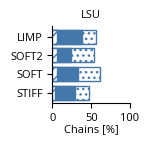

In [90]:
plt.rcParams['font.family'] = 'Open Sans'
NETS = ['STIFF', 'SOFT', 'SOFT2', 'LIMP']
fig, axs = plt.subplots(figsize=(1.0, 1.0))
width = 0.75

correl_07_per_s
correl_08_per_s

bar_colors_s = [singlecolor, singlecolor, singlecolor, singlecolor]

bars_07 = axs.barh(
    NETS, 
    correl_07_per_l, 
    height=width, 
    color='none',
    edgecolor=singlecolor,
    hatch='...',
    zorder=0,
    label='PCC ≥ 0.7',
    linewidth=1.0
)

bars_08 = axs.barh(
    NETS, 
    correl_08_per_l, 
    height=width, 
    edgecolor=singlecolor,
    color=singlecolor,
    zorder=1,
    label='PCC ≥ 0.8',
    linewidth=1.0
)

bars_neg = axs.barh(
    NETS, 
    correl_neg_low_per_l, 
    height=width, 
    edgecolor=singlecolor,
    color='white',
    hatch='///',
    zorder=2,
    label='PCC ≤ 0.4',
    linewidth=1.0
)

axs.set_yticks(range(len(NETS)))
axs.set_yticklabels(NETS, size=8)
axs.set_xlabel("Chains [%]", fontsize=8, labelpad=0)
axs.set_xlim(0, 100)
axs.set_xticks([0, 50,100])
axs.set_xticklabels([0,50,100], size=8)
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.set_title('LSU', fontsize=8)

# axs.legend(
#     fontsize=8,
#     frameon=True,
#     handlelength=1.0,
#     handletextpad=0.5
# )
plt.show()

In [81]:
def Merge(dict1, dict2): 
    res = dict1 | dict2 
    return res 

In [82]:
prot_rmsf_average_stiff = Merge(prot_rmsf_small_average_stiff, prot_rmsf_large_average_stiff)

In [83]:
prot_rmsf_average_soft = Merge(prot_rmsf_small_average_soft, prot_rmsf_large_average_soft)

In [84]:
prot_rmsf_average_soft2 = Merge(prot_rmsf_small_average_soft2, prot_rmsf_large_average_soft2)

In [85]:
prot_rmsf_average_limp = Merge(prot_rmsf_small_average_limp, prot_rmsf_large_average_limp)

In [86]:
prot_rmsf_average_aa = Merge(prot_rmsf_small_average_aa, prot_rmsf_large_average_aa)

In [87]:
pcc_low_chains = ['S', 'B']

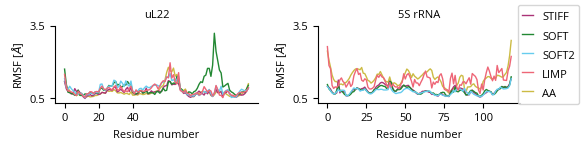

In [88]:
import matplotlib.patches as mpatches
plt.rcParams['font.family'] = 'Open Sans'

lw = 1.00
lsp = 14
ls = 18

plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 1.0), sharex=False, gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.3})

axs = axs.flatten() 
titles= ['uL22','5S rRNA']
axs[0].plot(prot_rmsf_average_aa['S'][:-1], color=aacolor3, label='AA',linewidth=lw)
axs[1].plot(prot_rmsf_average_aa['B'][1:], color=aacolor3, label='AA',linewidth=lw)
j = 0
for i in pcc_low_chains:
    axs[j].set_title(titles[j], fontsize=8, fontweight='normal')
    axs[j].plot(prot_rmsf_average_stiff[i], color=stcolor1, label='STIFF',linewidth=lw)
    axs[j].plot(prot_rmsf_average_soft[i], color=socolor4, label='SOFT',linewidth=lw)
    axs[j].plot(prot_rmsf_average_soft2[i], color=twcolor3, label='SOFT2',linewidth=lw)
    axs[j].plot(prot_rmsf_average_limp[i], color=lpcolor2, label='LIMP',linewidth=lw)
    axs[j].spines['top'].set_visible(False)
    axs[j].spines['right'].set_visible(False)
    
    axs[j].set_xlabel('Residue number', fontsize=8, fontweight='normal')
    axs[j].set_ylabel('RMSF [$\AA$]', fontsize=8, fontweight='normal', labelpad=3)
    j += 1
axs[0].set_yticks([0.5, 3.5])
axs[0].set_yticklabels([0.5,3.5], size=8)
axs[0].set_ylim([0.3, 3.5])
axs[1].set_yticks([0.5, 3.5])
axs[1].set_yticklabels([0.5,3.5], size=8)
axs[1].set_ylim([0.3, 3.5])
axs[1].set_xticks([0,25,50,75,100])
axs[1].set_xticklabels([0,25,50,75,100], size=8)
axs[0].set_xticks([0,20,40])
axs[0].set_xticklabels([0,20,40], size=8)

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,3,4,0]
fig.legend([handles[idx] for idx in order],[labels[idx] for idx in order], handlelength=1.0, handleheight=1.5,ncols=1, fontsize=8)